In [56]:
import os
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import blob_dog, blob_log, blob_doh
import matplotlib.pyplot as plt
from functools import reduce

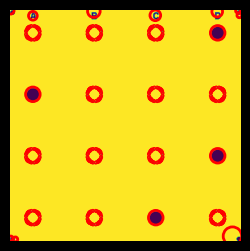

In [57]:

# Input format
# omr_sheet_1.png
# D A D C

# file = input()
# answer = input().split()

file = "../datasets/input/1.png"
answer = ["D", "A", "D", "C"]

image = np.array(Image.open(file), dtype=np.float32)
blobs = blob_doh(image, max_sigma=20, threshold=0.01)
fig, axes = plt.subplots(1, 1, figsize=(9, 3), sharex=True, sharey=True)
ax = axes
ax.imshow(image)

for idx, blob in enumerate(blobs):
    y, x, r = blob
    c = plt.Circle((x, y), r, color="red", linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_axis_off()


In [58]:
def get_x(pos: float) -> str | None :
    if 45.0 <= pos <= 52.0:
        return 'A'
    elif 178.0 <= pos <= 186.0:
        return 'B'
    elif 310.0 <= pos <= 320.0:
        return 'C'
    elif 445.0 <= pos <= 453.0:
        return 'D'
    else:
        return None

def get_y(pos: float) -> int | None :
    if 45.0 <= pos <= 52.0:
        return 0
    elif 178.0 <= pos <= 186.0:
        return 1
    elif 310.0 <= pos <= 320.0:
        return 2
    elif 445.0 <= pos <= 453.0:
        return 3
    else:
        return None


In [59]:
answers = ['', '', '', '']

for idx, blob in enumerate(blobs):
    y, x, r = blob

    if r > 14 and r < 20 and len(answers) <= 4:
        img = Image.open(file)

        print((r, x, y))

        if (idx := get_y(y)) is not None:
            opt = get_x(x)
            if opt is not None:
                answers[idx] = opt

        bbox = (x-r, y-r, x+r, y+r)
        output = img.crop(bbox)

        # plt.imshow(output)
        # plt.show()

(15.777777777777779, 449.0, 49.0)
(15.777777777777779, 49.0, 182.0)
(15.777777777777779, 449.0, 315.0)
(15.777777777777779, 315.0, 449.0)


In [60]:
count = 0
for (idx, x) in enumerate(answers):
    if x == answer[idx]:
        count += 1

In [61]:
count

4